In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/fashion-mnist/fashion-mnist_train.csv')

In [3]:
df.shape

(60000, 785)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df['label']
X = df.drop('label',axis=1)

In [6]:
y.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

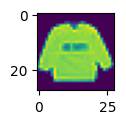

In [17]:
plt.figure(figsize=(1,1))
plt.imshow(X.iloc[0].values.reshape(28,28))

In [18]:
X = X/255

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y.shape

(60000,)

In [21]:
y = to_categorical(y,num_classes=10)
y.shape

(60000, 10)

In [23]:
X.shape

(60000, 784)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 40)                2040      
                                                                 
 dense_6 (Dense)             (None, 30)                1230      
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 42,830
Trainable params: 42,830
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(X,y,epochs=30,batch_size=64)

Epoch 1/30
938/938 [==============================] - 3s 2ms/step - loss: 0.5771 - accuracy: 0.7953
Epoch 2/30
938/938 [==============================] - 2s 2ms/step - loss: 0.4128 - accuracy: 0.8505
Epoch 3/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3744 - accuracy: 0.8642
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3520 - accuracy: 0.8730
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3343 - accuracy: 0.8785
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3203 - accuracy: 0.8828
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3094 - accuracy: 0.8885
Epoch 8/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8889
Epoch 9/30
938/938 [==============================] - 2s 2ms/step - loss: 0.2919 - accuracy: 0.8927
Epoch 10/30
938/938 [==============================] - 2s 2ms/step - loss: 0.2856 - accuracy: 0.8957

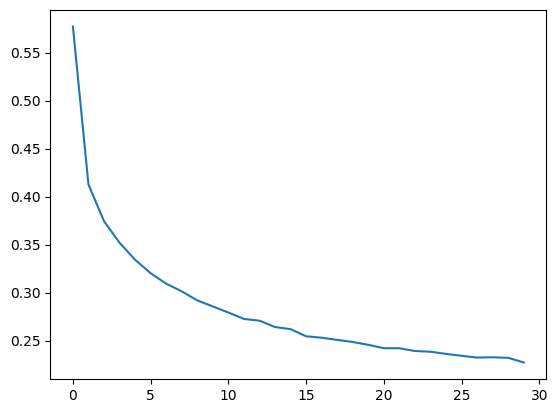

In [31]:
plt.plot(hist.history['loss'])

In [42]:
img = X.iloc[4].values.reshape(1,784)
model.predict_on_batch(img).argmax()

3

In [39]:
df['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64